In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.tree as tree

In [2]:
dados = pd.read_excel('vendas.xlsx')
dados.head()

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


In [3]:
dados.test.value_counts()

No     15
Yes    15
Name: test, dtype: int64

In [6]:
# vtransformando a coluna test em numérica

#dados['test'] = dados['test'].map({'No': 0, 'Yes': 1})

# usando o sklearn para transformar a coluna test em numérica (0 e 1) 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dados.test = le.fit_transform(dados.test)


In [7]:
dados.head()

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,0,Yes
1,2.5,11,0,No
2,2.5,11,0,No
3,1.5,13,0,Yes
4,2.5,13,0,No


In [9]:
x = dados.iloc[:, :-1]
x.head()

,media_rating,media_pedidos,test
0,1.5,11,0
1,2.5,11,0
2,2.5,11,0
3,1.5,13,0
4,2.5,13,0


In [13]:
y = dados[['cliente_comprou']]
y.head()

,cliente_comprou
0,Yes
1,No
2,No
3,Yes
4,No


In [19]:
arvore = tree.DecisionTreeClassifier()
modelo = arvore.fit(x, y)
modelo

DecisionTreeClassifier()

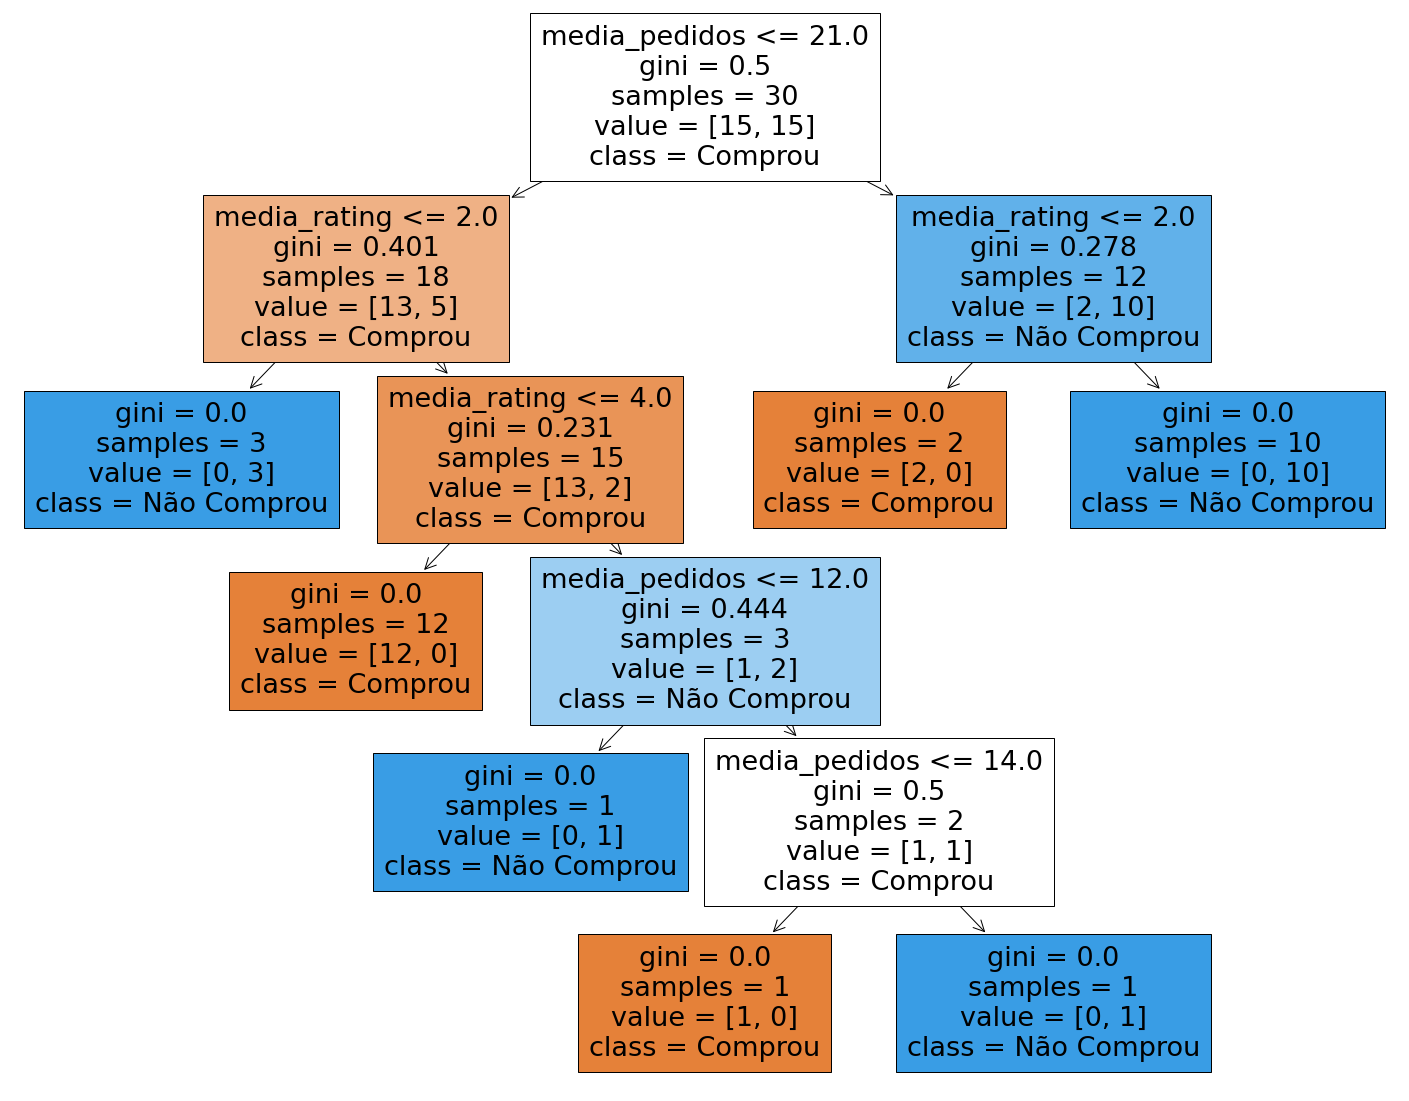

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelo, 
                     feature_names=x.columns,
                        class_names=['Comprou', 'Não Comprou'],
                        filled=True)